# Análisis de la Criminalidad en la Ciudad de Buenos Aires

En este análisis, exploraremos la evolución de los datos de criminalidad en la Ciudad de Buenos Aires a lo largo del tiempo. Los datos se desglosan por año, mes, día y franja horaria, y contienen información detallada sobre el tipo y subtipo de crimen, así como detalles geográficos como el barrio, la comuna, la latitud y la longitud. También se registran datos sobre el uso de armas y motocicletas en cada incidente.

## Evolución Temporal de la Criminalidad

Para visualizar cómo ha evolucionado la criminalidad en la Ciudad de Buenos Aires a lo largo del tiempo, podemos crear gráficos que muestren la cantidad de casos criminales registrados.

In [12]:
# Descargamos los datos directamente desde la pagina web de la ciudad

!wget https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-justicia-y-seguridad/delitos/delitos_2022.csv
!wget https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-justicia-y-seguridad/delitos/delitos_2021.csv
!wget https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-justicia-y-seguridad/delitos/delitos_2020.csv
!wget https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-justicia-y-seguridad/delitos/delitos_2019.csv
!wget https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-justicia-y-seguridad/delitos/delitos_2018.csv


--2024-03-26 02:27:36--  https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-justicia-y-seguridad/delitos/delitos_2022.csv
Resolving cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)... 200.16.89.97
Connecting to cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)|200.16.89.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16814251 (16M) [text/csv]
Saving to: ‘delitos_2022.csv.1’

delitos_2022.csv.1  100%[===================>]  16.04M   425KB/s    in 40s     

2024-03-26 02:28:18 (412 KB/s) - ‘delitos_2022.csv.1’ saved [16814251/16814251]

--2024-03-26 02:28:18--  https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-justicia-y-seguridad/delitos/delitos_2021.csv
Resolving cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)... 200.16.89.97
Connecting to cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)|200.16.89.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13448704 (13M) [text/csv]
Saving to: ‘delitos_2021.csv’

In [13]:
import pandas as pd
import os

# Get the current working directory
cwd = os.getcwd()

# Create an empty list to store the dataframes
dfs = []

# Iterate over all the files in the current directory
for filename in os.listdir(cwd):
    # Check if the file is a CSV file
    if filename.endswith('.csv'):
        # Read the CSV file into a dataframe
        df = pd.read_csv(filename)
        # Append the dataframe to the list
        dfs.append(df)

# Concatenate all the dataframes into one
datos = pd.concat(dfs, ignore_index=True)


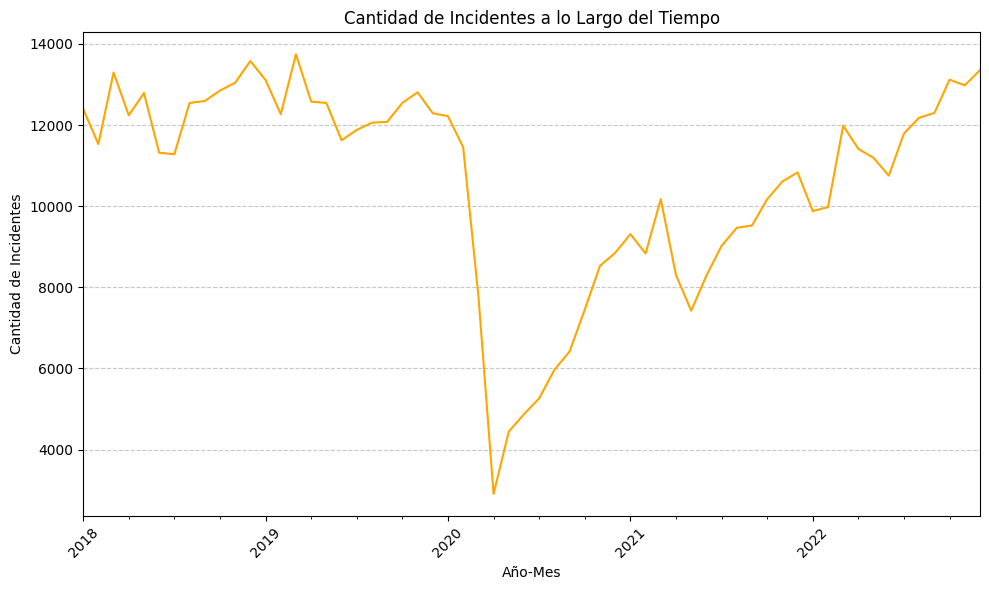

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Gráfico de líneas de la cantidad de incidentes a lo largo del tiempo
datos['fecha'] = pd.to_datetime(datos['fecha'])
datos['año_mes'] = datos['fecha'].dt.to_period('M')
incidentes_por_mes = datos.groupby('año_mes')['cantidad'].sum()

plt.figure(figsize=(10, 6))
incidentes_por_mes.plot(color='orange')
plt.title('Cantidad de Incidentes a lo Largo del Tiempo')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de Incidentes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Estos datos Reales tienen una tendencia alcista, sin embargo, para tenerlos con un poco mas de contexto, podemos agregar al analisis el crecimiento poblacional, ya que a mayor cantidad de personas si se tiene el mismo % de delitos se tendra tambien mayor cantidad de delitos.

En el 2022 se hizo un censo nacional y se tuvo que hubo un aproximado de 17.000.000 personas, mientras que en el 2010, se censaron aproximadamente 15.000.000 personas.

Crecimiento por año = Número de años / Crecimiento total​

Crecimiento por año = (17,000,000 − 15,000,000 )/ (2022 − 2010)

Crecimiento por año = 2,000,000 / 12

Crecimiento por año ≈ 166,666.67

Suponiendo que hacemos el analisis desde el 2018 y hasta diciembre del 2022 suponiendo que el censo se hizo el 1ero de enero del 2022 tenemos que:

Crecimiento total hasta 2018 = Crecimiento por año × Años

Crecimiento total hasta 2018 = 166,666.67 × 8

Crecimiento total hasta 2018 ≈ 1,333,333.36

Luego, sumamos este crecimiento al total de la población en 2010:

Población aproximada en 2018 = 15,000,000 + 1,333,333.36

Población aproximada en 2018 ≈ 16,333,333.36



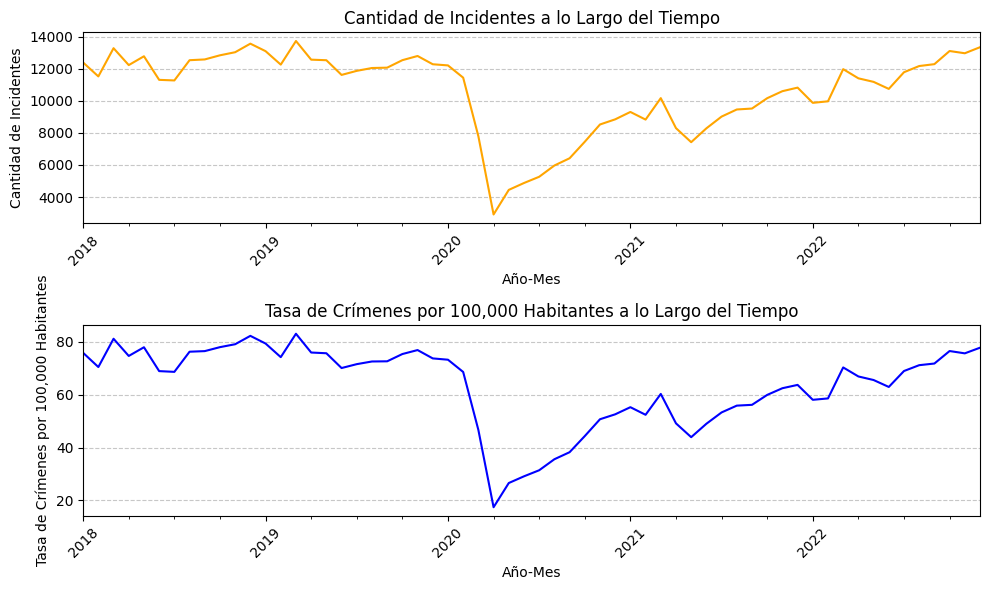

In [23]:
import numpy as np

# Población inicial en 2018
poblacion_2018 = 16333333  # Tomado del cálculo anterior

# Tasa de crecimiento por mes
crecimiento_por_mes = 166666.67 / 12  # Crecimiento anual dividido por 12 meses

# Crear un array de numpy con la población por mes
poblacion_por_mes = np.zeros(60)  # 5 años * 12 meses

# Calcular la población por mes desde enero de 2018 hasta diciembre de 2022
for i in range(60):
    poblacion_por_mes[i] = poblacion_2018 + (i + 1) * crecimiento_por_mes

# Calcula la cantidad de crímenes por cada 100,000 habitantes
# (suponiendo que tienes los datos de crímenes en un DataFrame llamado 'datos')
datos['fecha'] = pd.to_datetime(datos['fecha'])
datos['año_mes'] = datos['fecha'].dt.to_period('M')
tasa_por_mes = datos.groupby('año_mes')['cantidad'].sum()

# Calcula la tasa de crímenes por cada 10,0000 habitantes
tasa_por_100000 = (incidentes_por_mes / poblacion_por_mes) * 100000

# Graficar la cantidad de incidentes y la tasa de crímenes a lo largo del tiempo
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
incidentes_por_mes.plot(color='orange')
plt.title('Cantidad de Incidentes a lo Largo del Tiempo')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de Incidentes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
tasa_por_100000.plot(color='blue')
plt.title('Tasa de Crímenes por 100,000 Habitantes a lo Largo del Tiempo')
plt.xlabel('Año-Mes')
plt.ylabel('Tasa de Crímenes por 100,000 Habitantes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()